In [1]:
from IPython.display import Image
import PIL 
import os
import openslide
from openslide import open_slide
import pyvips
import cv2
import numpy as np
import pandas as pd
from PIL import Image as PImage
import torch
import torchvision.utils as vutils
from torchvision import transforms
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

# os.chdir('data/mai_mini')

In [4]:
slide = pyvips.Image.openslideload('MAI_Mitosis_DE.Char.RK_Bio31_HE_DE.Char.Hama.XR.01_40x_01.ndpi', level=0)

In [5]:
slide.width, slide.height

(61440, 53760)

In [14]:
slide.get_fields()

[]

In [77]:
slide = slide.resize(k)
slide.width, slide.height

(55520, 48580)

In [78]:
slide.tiffsave('wsi2.tiff', compression='jpeg', Q=80, tile=True, tile_width=240, tile_height=240, pyramid=False)

In [53]:
slide1 = pyvips.Image.openslideload('wsi1_test.tiff', level=0)
slide1.width, slide1.height

(49799, 38704)

In [60]:
wsi1_test = open_slide('wsi1.tiff')

In [ ]:
wsi1_test.properties

In [ ]:
img = wsi1_test.read_region((40000, 30704), 0, (1000, 1000))#.save('wsi2.png')
img

In [65]:
img.size

(41799, 31704)

In [27]:
wsi1.properties

<_PropertyMap {'aperio.AppMag': '40', 'aperio.Date': '11/11/20', 'aperio.DisplayColor': '0', 'aperio.Exposure Scale': '0.000001', 'aperio.Exposure Time': '45', 'aperio.Filename': 'X', 'aperio.Focus Offset': '0.000000', 'aperio.ICC Profile': 'AT2', 'aperio.ImageID': '1113407', 'aperio.Left': '25.522470', 'aperio.LineAreaXOffset': '0.009413', 'aperio.LineAreaYOffset': '-0.011159', 'aperio.LineCameraSkew': '-0.000421', 'aperio.MPP': '0.2514', 'aperio.OriginalHeight': '38804', 'aperio.OriginalWidth': '50800', 'aperio.Parmset': 'Light Stained', 'aperio.ScanScope ID': 'SS7533', 'aperio.SessonMode': 'NR', 'aperio.StripeWidth': '2032', 'aperio.Time': '17:58:09', 'aperio.Time Zone': 'GMT+01:00', 'aperio.Top': '18.340612', 'aperio.User': '14bd3a2a-24cd-42d0-a8ca-5563d79c90d6', 'openslide.comment': 'Aperio Image Library v12.0.16 \r\n50800x38804 [0,100 49799x38704] (240x240) JPEG/RGB Q=80|AppMag = 40|StripeWidth = 2032|ScanScope ID = SS7533|Filename = X|Date = 11/11/20|Time = 17:58:09|Time Zone = 

In [26]:
wsi2.properties

<_PropertyMap {'hamamatsu.AHEX[0]': '0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000', 'hamamatsu.AHEX[0].fluorescence': '0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000', 'hamamatsu.AHEX[0].ploidy': '0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000', 'hamamatsu.AHEX[1]': '0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000', 'hamamatsu.AHEX[1].fluorescence': '0000000000000000000000000000000000000000000000

In [17]:
wsi1 = open_slide('MAI_Mitosis_DE.Char.RK_Bio31_HE_AT.Graz.Leic.AT20.01_40x_01.svs')
# mpp1 = (float(wsi1.properties[openslide.PROPERTY_NAME_MPP_X])+float(wsi1.properties[openslide.PROPERTY_NAME_MPP_Y]))/2
mpp1 = float(wsi1.properties[openslide.PROPERTY_NAME_MPP_X])
print(wsi1.properties[openslide.PROPERTY_NAME_MPP_X], wsi1.properties[openslide.PROPERTY_NAME_MPP_Y])
print('Microns per pixel:', mpp1)

0.25140000000000001 0.25140000000000001
Microns per pixel: 0.2514


In [18]:
wsi2 = open_slide('MAI_Mitosis_DE.Char.RK_Bio31_HE_DE.Char.Hama.XR.01_40x_01.ndpi')
mpp2 = float(wsi2.properties[openslide.PROPERTY_NAME_MPP_X])
print(wsi2.properties[openslide.PROPERTY_NAME_MPP_X], wsi2.properties[openslide.PROPERTY_NAME_MPP_Y])
print('Microns per pixel:', mpp2)


0.22717462913741793 0.22717462913741793
Microns per pixel: 0.22717462913741793


In [4]:
print(wsi2.level_count, wsi2.level_dimensions[2])

10 (15360, 13440)


In [6]:
wsi2.read_region((0, 0), 0, wsi2.level_dimensions[0]).save('wsi2.png')

In [9]:
k = min(mpp1, mpp2)/max(mpp1, mpp2)
k

0.9036381429491563

In [39]:
l = 2
w, h = wsi1.level_dimensions[l]
print(wsi1.level_count, (w, h))
img = wsi1.read_region((0, 0), l, wsi1.level_dimensions[l]).resize((int(w/2), int(h/2)), PIL.Image.BILINEAR)#.save('wsi1.png')
# img

3 (3112, 2419)


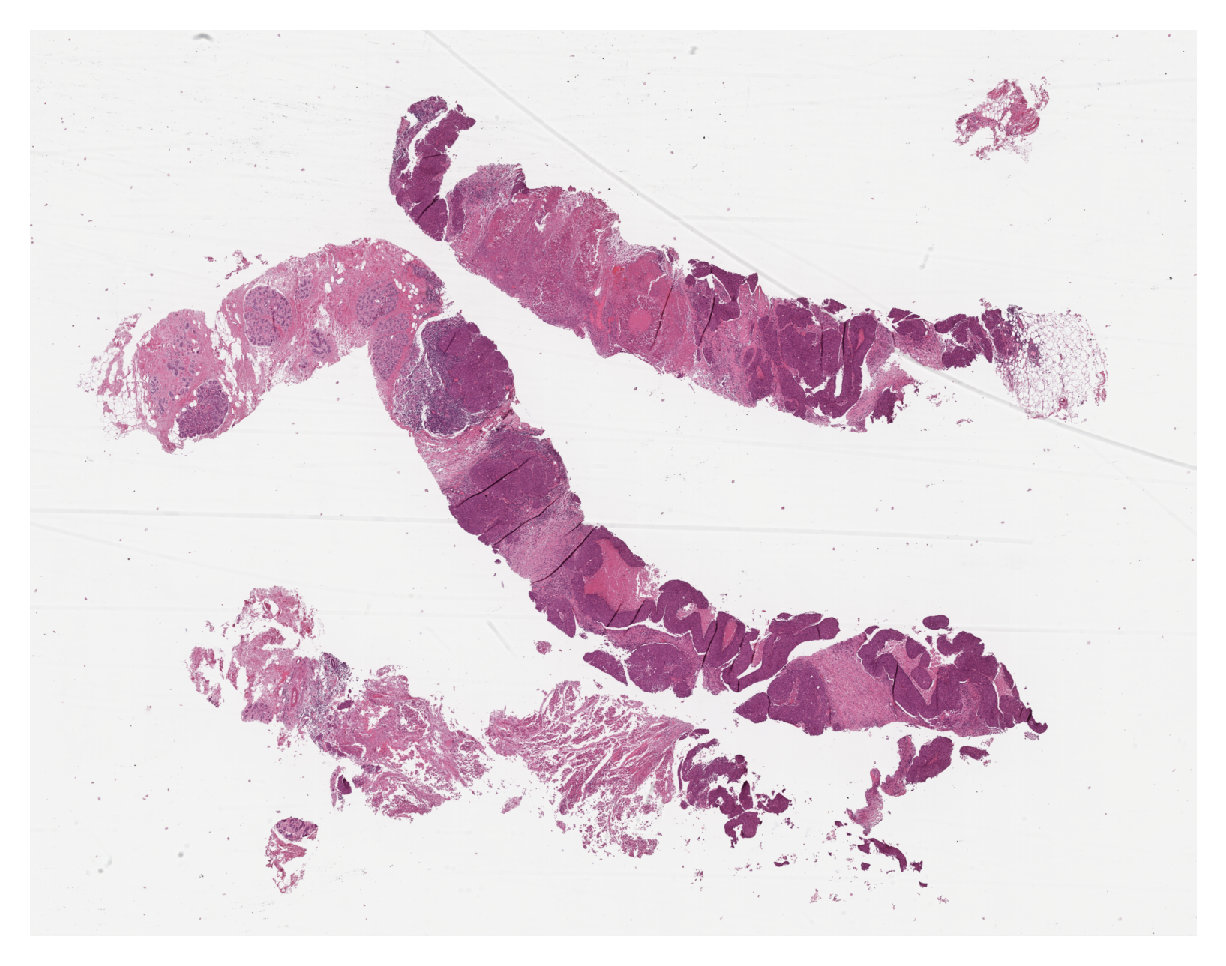

In [40]:
img = np.array(img.convert("RGB"))
plt.axis('off')
plt.imshow(img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


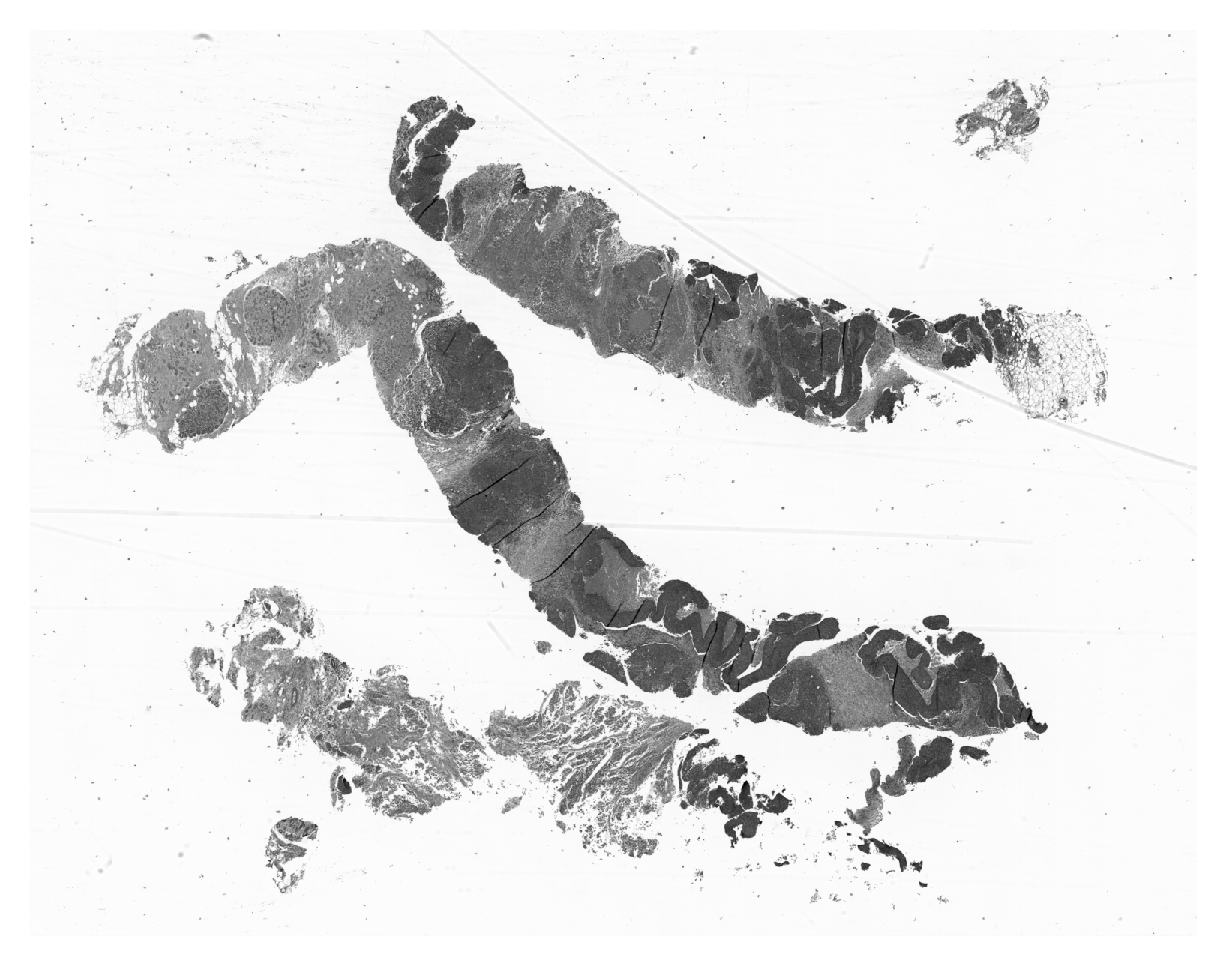

In [41]:
plt.axis('off')

plt.imshow(img, cmap='gray')

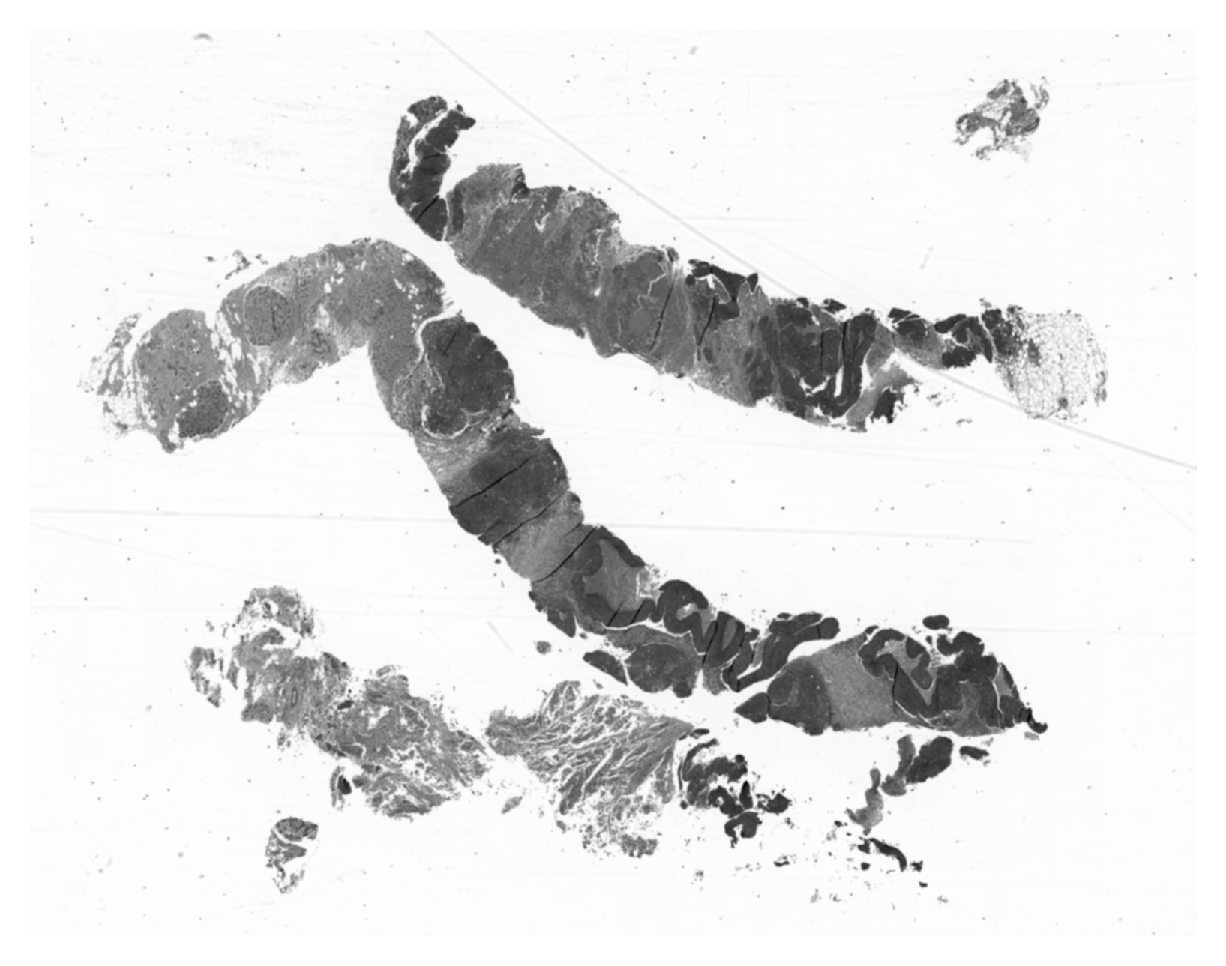

In [42]:
plt.axis('off')

img = cv2.GaussianBlur(img, (5,5), 0)
plt.imshow(img, cmap='gray')

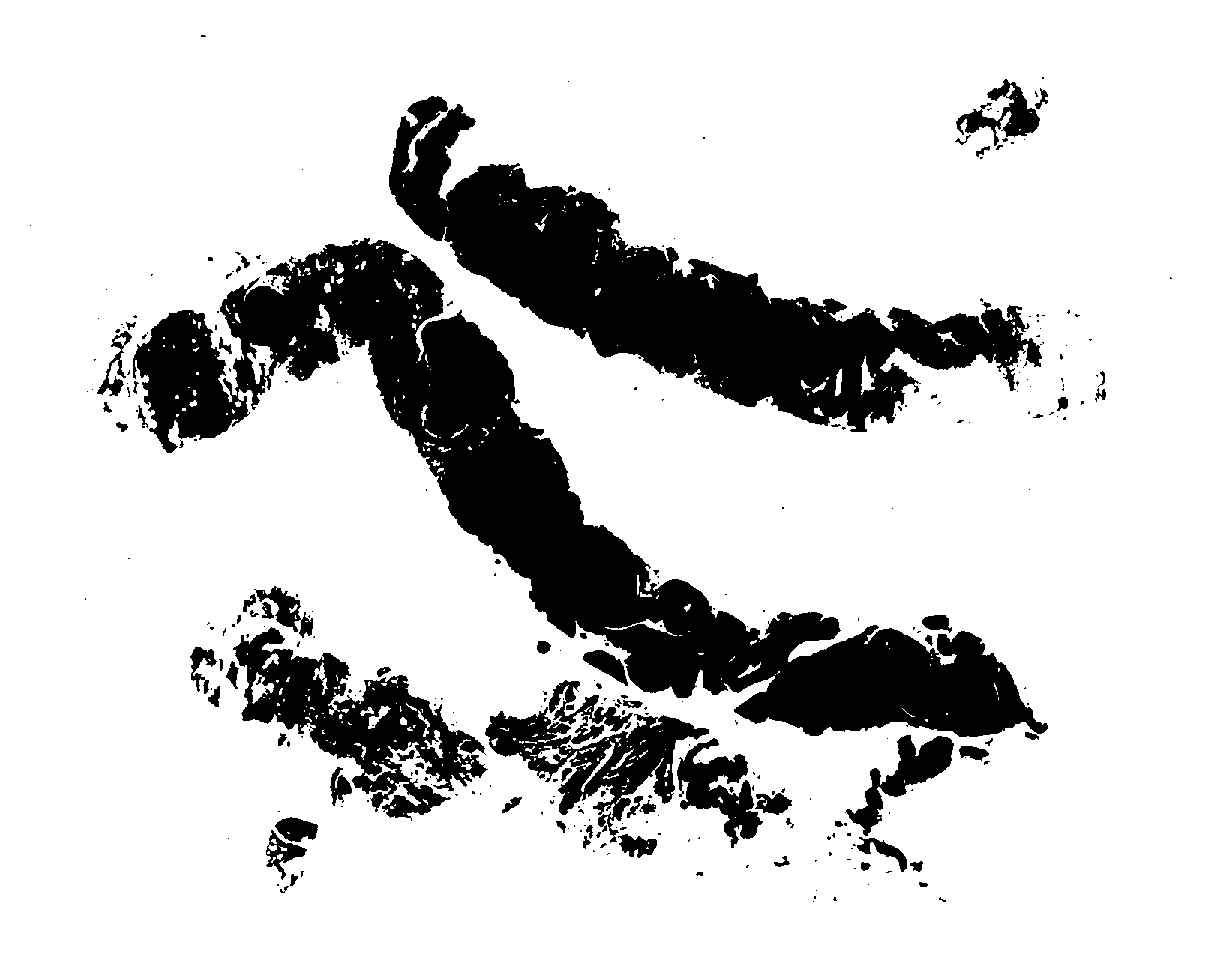

In [43]:
plt.axis('off')

# mask = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)[1]
mask = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
plt.imshow(mask, cmap='gray')

In [32]:
from openslide.deepzoom import DeepZoomGenerator

In [35]:
dz = DeepZoomGenerator(wsi1, tile_size=64, overlap=0)

In [49]:
256/16

16.0

In [ ]:
!python3 pyhist.py --save-patches --output-downsample 1 --patch-size 128 --mask-downsample 16 --tilecross-downsample 16 --method "otsu" --info  "verbose" --save-tilecrossed-image --content-threshold 0.2 wsi2.tiff

In [ ]:
!python3 pyhist.py --save-patches --output-downsample 1 --patch-size 128 --mask-downsample 16 --tilecross-downsample 16 --method "otsu" --info  "verbose" --save-tilecrossed-image --content-threshold 0.2 MAI_Mitosis_DE.Char.RK_Bio31_HE_AT.Graz.Leic.AT20.01_40x_01.svs

In [6]:
389*128

49792

In [ ]:
# Image('output/MAI_Mitosis_DE.Char.RK_Bio31_HE_AT.Graz.Leic.AT20.01_40x_01/tilecrossed_MAI_Mitosis_DE.Char.RK_Bio31_HE_AT.Graz.Leic.AT20.01_40x_01.png')

In [ ]:
from PIL import Image as PImage

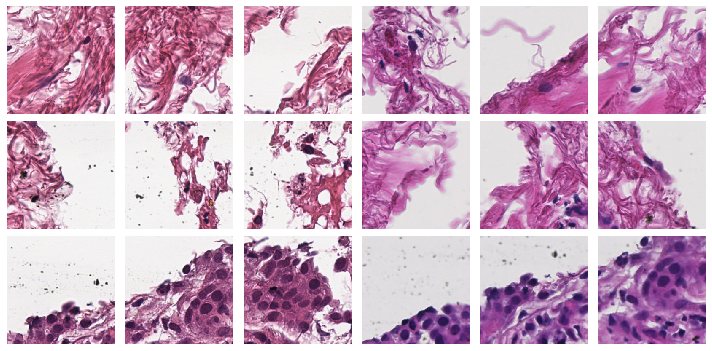

In [108]:
path1 = "output/MAI_Mitosis_DE.Char.RK_Bio31_HE_AT.Graz.Leic.AT20.01_40x_01/MAI_Mitosis_DE.Char.RK_Bio31_HE_AT.Graz.Leic.AT20.01_40x_01_tiles/"
path2 = "output/wsi2/wsi2_tiles/"

tiles1 = sorted(os.listdir(path1))
tiles2 = sorted(os.listdir(path2))

f, axarr = plt.subplots(3, 6, figsize=(10,5))
for i in range(0, 3):
  for j in range(0, 3):
    image_path = path1 + tiles1[4*i + j+8]
    img = PImage.open(image_path)
    axarr[i, j].imshow(img)
    axarr[i, j].set_axis_off()
f.tight_layout()

for i in range(0, 3):
  for j in range(0, 3):
    image_path = path2 + tiles2[4*i + j+3]
    img = PImage.open(image_path)
    axarr[i, j+3].imshow(img)
    axarr[i, j+3].set_axis_off()
f.tight_layout()

In [53]:
from cyclegan.model import Generator as CycleGANGenerator

device0 = torch.device("cuda:0")
device1 = torch.device("cuda:0")

gAB = CycleGANGenerator()
gBA = CycleGANGenerator()

gAB.to(device0)
gBA.to(device1)

gAB.eval()
gBA.eval()

gAB.load_state_dict(torch.load('results/cyclegan_mai128_r1/netG_A2B_last.pth', map_location=device0));
gBA.load_state_dict(torch.load('results/cyclegan_mai128_r1/netG_B2A_last.pth', map_location=device1));

ModuleNotFoundError: No module named 'cyclegan'

In [2]:
transform = transforms.Compose([
#     transforms.Resize([img_size, img_size]),
#     transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5],
                         std=[0.5, 0.5, 0.5]),
])

def normalize(x):
    out = (x-.5)/.5
    return torch.from_numpy(out)
def denormalize(x):
    return (x + 1) / 2

unloader = transforms.ToPILImage()

def to_pil(x):
    return unloader(denormalize(x.cpu().squeeze(0)))

path1 = "/data/aray/pathology_gan/data/mai/wsi1_tiles/"
path2 = "/data/aray/pathology_gan/data/mai/wsi2_tiles/"

pathT1 = "/data/aray/pathology_gan/data/mai/wsiT1/"
pathT2 = "/data/aray/pathology_gan/data/mai/wsiT2/"

tiles1 = sorted(os.listdir(path1))
tiles2 = sorted(os.listdir(path2))

# netG_A2B.eval()
# netG_B2A.eval();

FileNotFoundError: [Errno 2] No such file or directory: '/data/aray/pathology_gan/data/mai/wsi1_tiles/'

In [3]:
wsi1_df = pd.read_csv('/data/aray/pathology_gan/data/mai/wsi1.tsv', delimiter='\t')
wsi2_df = pd.read_csv('/data/aray/pathology_gan/data/mai/wsi2.tsv', delimiter='\t')

FileNotFoundError: [Errno 2] File /data/aray/pathology_gan/data/mai/wsi1.tsv does not exist: '/data/aray/pathology_gan/data/mai/wsi1.tsv'

In [47]:
@torch.no_grad()
def get_area(x_offset, y_offset, nrow, wsi_df, path, G, device):
    imgs = []
    imgsT = []
    for tile in wsi_df.query(f'Row > {x_offset} and Row <={x_offset+nrow} and Column > {y_offset} and Column <= {y_offset+nrow}').values:
        if tile[3] ==1:
            img = transform(PImage.open(path+tile[0]+'.png')).unsqueeze(0)
        else:
            img = torch.ones((1, 3,128, 128), dtype=torch.float32)
        imgs.append(img)
        img = img.to(device)
        imgsT.append(G(img).cpu())
        # free memory
        del img
    # reassemble the area of nrow*nrow
    return vutils.make_grid(torch.cat(imgs, dim=0), padding=0, nrow=nrow), vutils.make_grid(torch.cat(imgsT, dim=0), padding=0, nrow=nrow)

In [48]:
img1, imgT1 = get_area(146, 160, 12, wsi1_df, '/data/aray/pathology_gan/data/mai/wsi1_tiles/', gAB, device0)
plt.axis('off')
plt.imshow(denormalize(np.transpose(imgT1, (1, 2, 0))));

NameError: name 'wsi1_df' is not defined

In [71]:
(1536)/32 - 128//32

44.0

In [ ]:
(1536-32)/32

In [72]:
# plt.imshow(denormalize(np.transpose(img2[:, 0:256, 0:512], (1, 2, 0))));
1536-44*32

128

In [44]:
def sliding_window(img, window, G, device):
    start =  128//2-window//2
    end = start+window

    imgs = []
    with torch.no_grad():
        for row in range((img.shape[1])//window-128//window):
            y = row*window
            for col in range((img.shape[2])//window-128//window):
                x = col*window
                # read a tile of size 128x128 pixels
                # and translate it
                imgT = G(img[:, y:y+128, x:x+128].unsqueeze(0).to(device)).cpu()
                # read only a center area of the translated tile
                # of size window*window
                imgs.append(imgT[:, :, start:end, start:end])

    return vutils.make_grid(torch.cat(imgs, dim=0), padding=0, nrow=(img.shape[1])//window-128//window)

In [45]:
img = sliding_window(img1, 64, gAB, device0)

plt.axis('off')

plt.imshow(denormalize(np.transpose(img, (1, 2, 0))));
save_image(denormalize(img), f'translated_{offset}.png')

NameError: name 'img1' is not defined

In [ ]:
offset = 2
win_start =  128//2-offset//2
win_end = win_start+offset

imgs = []
with torch.no_grad():
    for row in range((img1.shape[1])//offset-128//offset):
        y = row*offset
        for col in range((img1.shape[2])//offset-128//offset):
            x = col*offset

            img = gAB(img1[:, y:y+128, x:x+128].unsqueeze(0).to(device0)).cpu()
            imgs.append(img[:, :, win_start:win_end, win_start:win_end])
        
plt.axis('off')
img = vutils.make_grid(torch.cat(imgs, dim=0), padding=0, nrow=(img1.shape[1])//offset-128//offset)
plt.imshow(denormalize(np.transpose(img, (1, 2, 0))));
save_image(denormalize(img), f'translated_{offset}.png')


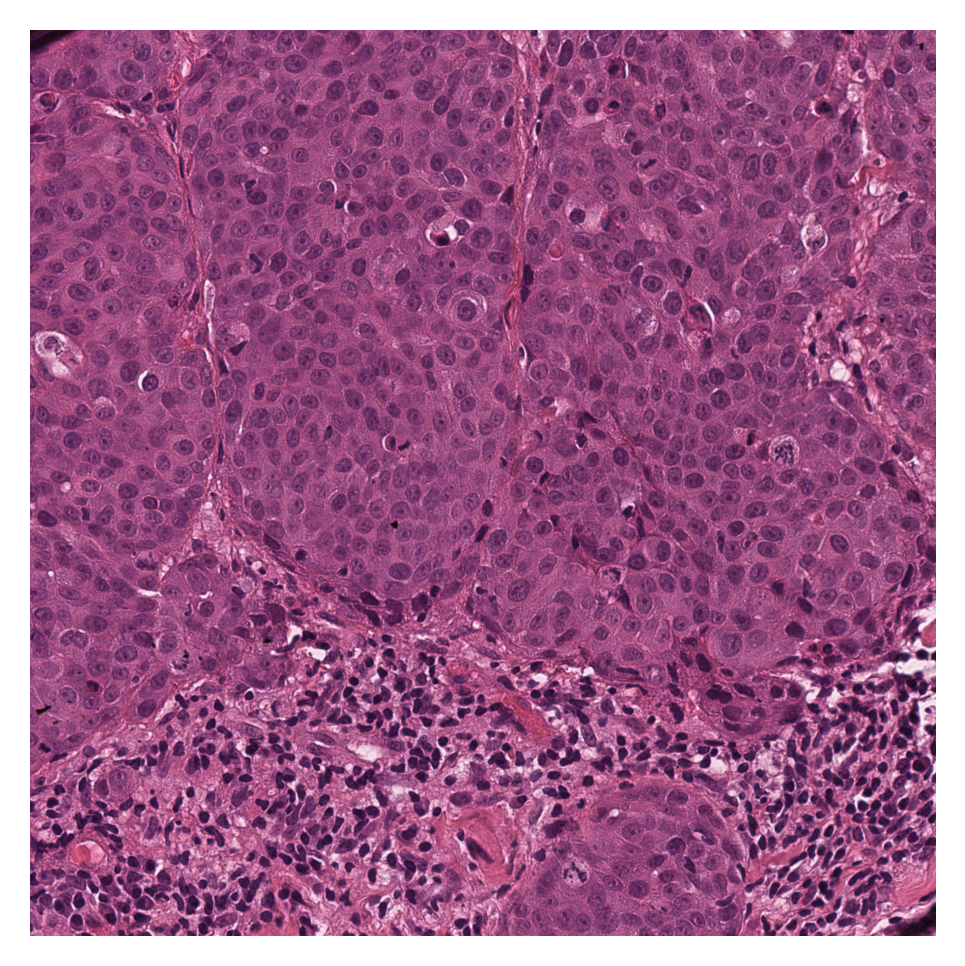

In [52]:
plt.axis('off')
plt.imshow(denormalize(np.transpose(img1, (1, 2, 0))));

In [23]:
from torchvision.utils import save_image

save_image(denormalize(imgT1), 'translated.png')
save_image(denormalize(img2), 'original.png')

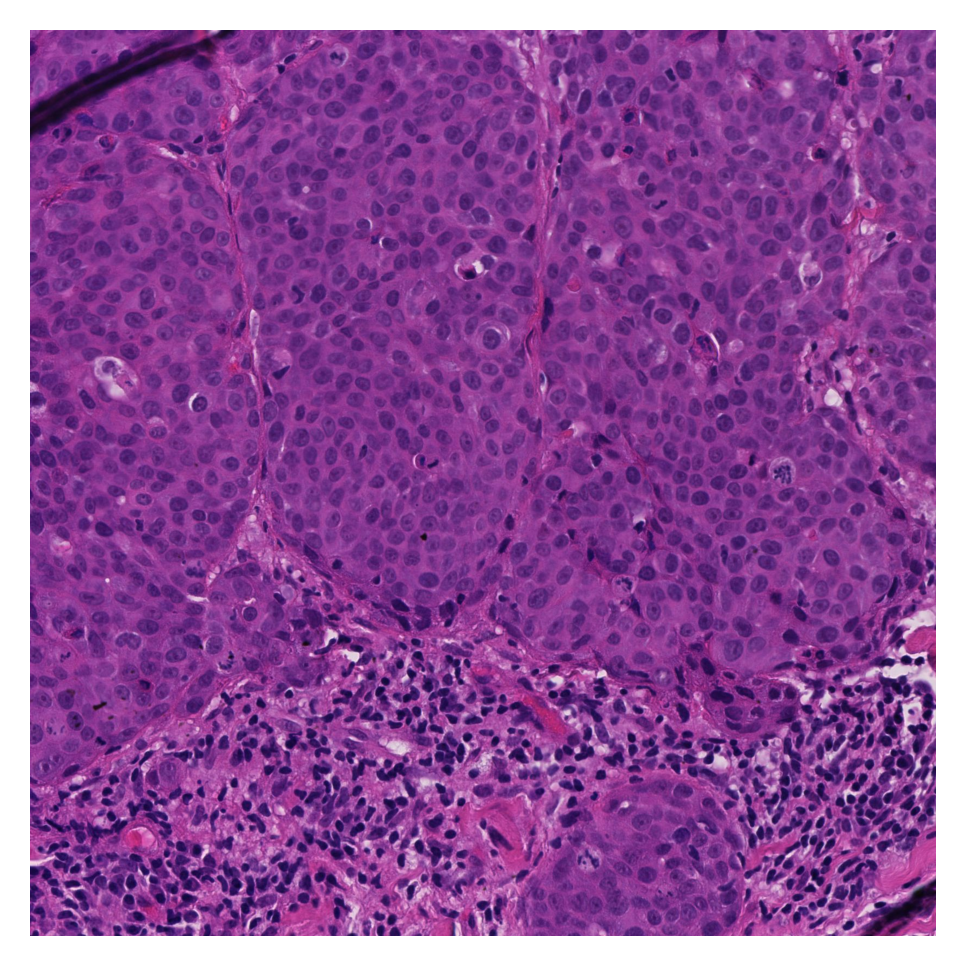

In [21]:
img2, imgT2 = get_area(187, 192, 13, wsi2_df, '/data/aray/pathology_gan/data/mai/wsi2_tiles/', gBA, device1)
plt.axis('off')
plt.imshow(denormalize(np.transpose(img2, (1, 2, 0))));